In [2]:
'''Word Cloud visual image analysis of almost half a million tweets from November regarding the 2020 elections'''

'Word Cloud visual image analysis of almost half a million tweets from November regarding the 2020 elections'

In [4]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m216126\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
path = r'C:\Users\m216126\Documents\capstoneStuff\twitterCapture\captures\november'      # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
li = []
for file in all_files:
    df = pd.read_csv(file, index_col = None, header=0)
    li.append(df)

In [6]:
# Naming the columns

for i in range(len(li)):
    li[i].columns = ['Date','id','tweet','tweet_info','metadata']

In [7]:
## Concatenate all the files into a single dataset

frames = []

for i in range(len(li)):
    frames.append(li[i])
tweet_dataset = pd.concat(frames, ignore_index=True)

In [8]:
tweet_dataset.shape 

(184498, 5)

In [9]:
tweet_dataset.tail()

,Date,id,tweet,tweet_info,metadata
184493,2020-11-09 20:59:50,1325905965485608961,b'RT @AlexandraChalup: Americans can rest well...,User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184494,2020-11-09 20:59:50,1325905965435203585,b'RT @realDonaldTrump: Georgia will be a big p...,User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184495,2020-11-09 20:59:50,1325905965426872321,"b'RT @pauloeneas: Kennedy Alencar: ""Bolsonaro ...",User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184496,2020-11-09 20:59:50,1325905965422534656,"b""RT @Vbretired: @realDonaldTrump I'm glad to ...",User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
184497,2020-11-09 20:59:50,1325905965351378950,b'@thehill A graduate of Rice University with ...,User(_api=<tweepy.api.API object at 0x10daebb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [12]:
#Cleaning Tweets

corpus = []
for i in range(0, int(tweet_dataset.shape[0])):
    try:
        tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['tweet'][i])
        tweet = tweet.lower()
        tweet = re.sub("b'", '', tweet)
        tweet = re.sub('https', '', tweet)
        tweet = tweet.split()
        ps = PorterStemmer()
        tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
        for j in range(len(tweet)):
            if len(tweet[j]) <= 3:
                tweet[j] = ''
            elif (len(tweet[j]) == 4) and (tweet[j][0]=='x'):
                tweet[j] = ''
            elif (len(tweet[j]) == 5) and (tweet[j][0]=='x'):
                tweet[j] = ''
        tweet = ' '.join(tweet)
        corpus.append(tweet)
    except:
        continue

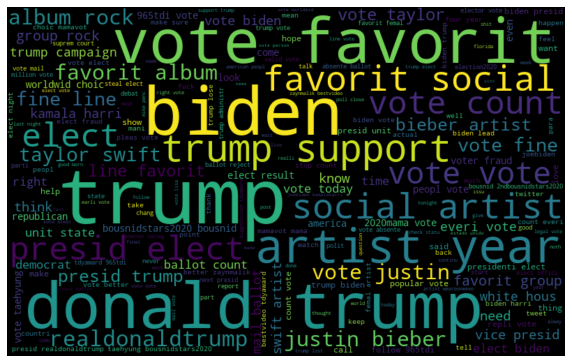

In [13]:
#Visualization

#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()